---
# <div align="center">Reinforcement Learning for Cryptocurrency Trading: A Comparative Study of PPO and DQN</div>
---


# ABSTRACT

In this project, we utilize reinforcement learning techniques to design and fine-tune trading strategies for cryptocurrencies. The focus is placed on two prominent reinforcement learning algorithms: Proximal Policy Optimization (PPO) and Deep Q-Network (DQN). We train both a PPO agent and a DQN agent using historical Bitcoin price data and evaluate their performances within a simulated trading environment. The strengths and weaknesses of each approach are discussed, illustrating the unique challenges posed by the application of reinforcement learning to cryptocurrency trading. This project not only demonstrates the potential of reinforcement learning in crafting data-driven cryptocurrency trading strategies but also provides valuable insights for future enhancements and research directions. The comparative study between PPO and DQN offers a broader perspective on the capabilities of different reinforcement learning algorithms in the context of financial markets.

# INTRODUCTION:
Reinforcement Learning (RL) has proven to be an effective approach in developing algorithms capable of learning optimal strategies through interactions with an environment. It has been successfully used in various fields, such as game playing, robotics, and resource management. In the field of finance, RL has been used to create automated trading systems capable of learning optimal trading strategies.

In recent years, the cryptocurrency market has emerged as a new avenue for traders and investors. However, the highly volatile nature of the cryptocurrency market presents a challenging environment for developing profitable trading strategies. RL, with its ability to learn from an uncertain and dynamic environment, provides a promising approach to tackle these challenges.

## Problem Statement:

The primary goal of this study is to apply and compare the performances of two RL methods, PPO and DQN, in developing a profitable trading strategy for the Bitcoin cryptocurrency. We use historical Bitcoin price data as our environment and the RL agent's task is to learn to make buy, sell, or hold decisions to maximize cumulative rewards, i.e., trading profits.

# Related Work
RL has been previously used in the context of stock trading. For instance, 
 [Deep Reinforcement Learning for Automated Stock Trading proposes an automated stock trading](https://towardsdatascience.com/deep-reinforcement-learning-for-automated-stock-trading-f1dad0126a02) system using RL. However, the application of RL in cryptocurrency trading is relatively less explored, and the comparison of different RL algorithms in this domain is even less studied. Our work aims to fill this gap.



1. **"Deep Reinforcement Learning for Automated Stock Trading: An Ensemble Strategy"** by Jiang et al. (2019): This study proposes an ensemble strategy that combines multiple RL agents to improve trading performance. The authors use DQN and other RL algorithms to train agents on historical stock data.

2. **"Cryptocurrency Portfolio Management with Deep Reinforcement Learning"** by Xu et al. (2018): This paper applies DQN to cryptocurrency portfolio management. The authors train an agent to dynamically allocate capital among a set of cryptocurrencies to maximize returns.

3. **"Deep reinforcement learning for the optimal placement of cryptocurrency limit orders"** by Schnaubelt, M. (2022): This paper applies PPO to optimize limit order placement. 






# Comparison of PPO and DQN
Proximal Policy Optimization (PPO) and Deep Q-Learning (DQN) are both advanced reinforcement learning methods that use deep learning to approximate the policy or value function. However, they differ in their approach and underlying algorithms.

# Deep Q-Learning (DQN)
DQN is a value-based method that learns an approximation of the action-value function, also known as the Q-function. The Q-function is defined as:

$$Q(s, a) = r + \gamma \max_{a'} Q(s', a')$$


where $s$ is the current state, $a$ is the action taken, $r$ is the immediate reward, $\gamma$ is the discount factor, $s'$ is the next state, and $a'$ are the possible actions in the next state.

The objective of DQN is to minimize the difference between the predicted Q-values and the target Q-values, expressed by the following loss function:

$$L = \mathbb{E}[(r + \gamma \max_{a'} Q(s', a') - Q(s, a))^2]$$


DQN introduces techniques like experience replay and target networks to handle challenges like correlation between samples and overestimation of Q-values.

# Proximal Policy Optimization (PPO)
PPO, on the other hand, is a policy-based method that directly optimizes the policy function. Unlike DQN, PPO does not try to estimate the value function but instead tries to find the policy that will maximize the expected return.

The objective function for PPO is defined as:

$$L^{CLIP}(\theta) = \mathbb{E}\left[\min \left(r_t(\theta)A_t, \text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon) A_t\right)\right]$$

where $r_t(\theta) = \frac{\pi_\theta(a|s)}{\pi_{\theta_{old}}(a|s)}$ is the probability ratio, $A_t$ is the advantage function at time $t$, and $\epsilon$ is a hyperparameter that limits the update step size to avoid large policy updates.

PPO introduces a surrogate objective function with a clipped objective to prevent overly large policy updates, leading to more stable and efficient learning.

In both methods, the optimization is done using stochastic gradient descent or its variants. While DQN uses a replay buffer to break the correlation of samples and uses target networks to stabilize learning, PPO uses the concept of a trust region to ensure the new policy does not deviate far from the old policy.

# States, Actions, Environment, and Rewards:
**States:** In this implementation, the states are represented by a window of historical Bitcoin prices. We use a window size of 10 in our example. The states are pre-processed by scaling the data using StandardScaler. Each state is an array of length 10, containing the historical prices of Bitcoin.

- **Actions:** There are three possible actions in this environment: Buy (0), Sell (1), and Hold (2). The agent decides which action to take based on the current state of the environment.

- **Environment:** The custom trading environment, CryptoTradingEnv, is a subclass of the gym.Env class. It takes the historical price data and the window size as input. The environment has discrete action space and continuous observation space. It implements the reset() and step() functions, which are used to reset the environment and take an action, respectively.

- **Rewards:** The rewards are calculated as follows:

- - If the agent buys, the reward is the difference between the current price and the previous price.
If the agent sells, the reward is the difference between the previous price and the current price.
If the agent holds, the reward is 0.





# Training and Testing Data:
In this implementation, we do not explicitly separate the data into training and testing sets. Instead, the agent is trained and tested on the entire historical price data available. However, it is a good practice to separate the data into training and testing sets to evaluate the performance of the agent more accurately.

To create separate training and testing sets, we can split the data into two parts, for example, using the first 80% of the data for training and the remaining 20% for testing. You can then create separate environments for training and testing with their respective data and evaluate the agent's performance on both.

---
# <div align="center">IMPLEMENTATION</div>
---


# Step 1: Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import random
from collections import deque
import gym
from gym import spaces
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import yfinance as yf

# Step 2: Loading the dataset and preparing it for the agent

# Data Pre-processing and Requirements:
We used historical Bitcoin price data from Yahoo Finance, with the ticker symbol "BTC-USD". The data spans from January 1, 2010, to May 8, 2023. We use the 'Close' prices for the analysis.

The data is pre-processed using the preprocess_data function. This function scales the data using StandardScaler from the sklearn.preprocessing module. The function also creates states by taking a sliding window of the specified size (10 in our example) on the scaled data.

To run the models, the following libraries are required: numpy, pandas, gym, tensorflow, matplotlib, sklearn, and yfinance.

The window length in time-series analysis, including financial data analysis like in cryptocurrency trading, is a parameter that determines the size of the "look-back" period used to make predictions or inform decision-making processes.

In the context fo our work, a window length of 10 implies that the model will use the previous 10 data points (such as the prices of the last 10 periods) to inform its decision for the next action (buy, sell, hold).

The choice of window length is largely empirical and can significantly impact the performance of the model. Here are some reasons for choosing a window length of 10:

1. Historical Performance: Previous experiments or related works have shown that a window length of 10 provides a good balance between learning meaningful trends in the data and not overfitting to noise or short-term fluctuations.

2. Computational Efficiency: A smaller window size reduces the dimensionality of the data, leading to faster training times and lower computational resource requirements. It's a balance between complexity and performance.

3. Short-Term Trends: In fast-moving markets like cryptocurrencies, recent information may be more relevant for decision making. A window length of 10 prioritizes more recent data without completely ignoring slightly older information.

4. Avoid Overfitting: A longer window might capture more information, but it might also introduce more noise into the model, leading to overfitting. A window of 10 could be a compromise to include just enough information for the model to learn from and make predictions

In [ ]:
def preprocess_data(data, window_size):
    scaler = StandardScaler()
    data = scaler.fit_transform(data.reshape(-1, 1))
    states = []
    for i in range(len(data) - window_size - 1):
        state = data[i:i + window_size]
        states.append(state)
    return np.array(states)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load the dataset (historical Bitcoin prices)

# Define the ticker symbol
ticker = "BTC-USD"

# Set the start and end dates for the data
start_date = "2010-01-01"
end_date = "2023-05-08"

# Get the data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

data = data['Close'].values

# Define the window size for the state
window_size = 10

# Preprocess the data
states = preprocess_data(data, window_size)
states

[*********************100%***********************]  1 of 1 completed


array([[[-0.80291525],
        [-0.80496613],
        [-0.80681438],
        ...,
        [-0.80504313],
        [-0.8057683 ],
        [-0.80621403]],

       [[-0.80496613],
        [-0.80681438],
        [-0.80593477],
        ...,
        [-0.8057683 ],
        [-0.80621403],
        [-0.80651984]],

       [[-0.80681438],
        [-0.80593477],
        [-0.80656342],
        ...,
        [-0.80621403],
        [-0.80651984],
        [-0.80791264]],

       ...,

       [[ 0.88472144],
        [ 0.93349367],
        [ 0.94067015],
        ...,
        [ 0.92002467],
        [ 0.95674571],
        [ 0.97705692]],

       [[ 0.93349367],
        [ 0.94067015],
        [ 1.00620328],
        ...,
        [ 0.95674571],
        [ 0.97705692],
        [ 0.96716867]],

       [[ 0.94067015],
        [ 1.00620328],
        [ 0.99787823],
        ...,
        [ 0.97705692],
        [ 0.96716867],
        [ 1.00998142]]])

# Step 3: Define the custom trading environment

In [ ]:
class CryptoTradingEnv(gym.Env):
    def __init__(self, data, window_size):
        super(CryptoTradingEnv, self).__init__()
        self.data = data
        self.window_size = window_size
        self.current_step = self.window_size
        self.action_space = spaces.Discrete(3)  # Buy, Sell, Hold
        self.observation_space = spaces.Box(low=0, high=1, shape=(self.window_size,))

    def reset(self):
        self.current_step = self.window_size
        return self.data[self.current_step - self.window_size:self.current_step]

    def step(self, action):
        self.current_step += 1
        if self.current_step >= len(self.data):
            return self.reset()

        price_now = self.data[self.current_step]
        price_prev = self.data[self.current_step - 1]

        if action == 0:  # Buy
            reward = price_now - price_prev
        elif action == 1:  # Sell
            reward = price_prev - price_now
        else:  # Hold
            reward = 0

        next_state = self.data[self.current_step - self.window_size:self.current_step]

        done = self.current_step == len(self.data) - 1

        return next_state, reward, done, {}


# Step 3: Define the PPO agent

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense

class PPOAgent:
    def __init__(self, state_size, action_size, learning_rate=0.001, gamma=0.99, epsilon_clip=0.2):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon_clip = epsilon_clip

        self.actor = self.build_actor()
        self.critic = self.build_critic()

        self.actor_optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.critic_optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)

    def build_actor(self):
        model = tf.keras.Sequential([
            Dense(64, input_shape=(self.state_size,), activation='relu'),
            Dense(32, activation='relu'),
            Dense(self.action_size, activation='softmax')
        ])
        return model

    def build_critic(self):
        model = tf.keras.Sequential([
            Dense(64, input_shape=(self.state_size,), activation='relu'),
            Dense(32, activation='relu'),
            Dense(1, activation='linear')
        ])
        return model


    def get_action(self, state):
        logits = self.actor(np.array([state]))
        probabilities = tf.nn.softmax(logits).numpy()[0]
        return np.random.choice(self.action_size, p=probabilities)

    
    def train(self, states, actions, rewards, next_states, dones):
      states = tf.convert_to_tensor(states, dtype=tf.float32)
      next_states = tf.convert_to_tensor(next_states, dtype=tf.float32)
      rewards = tf.convert_to_tensor(rewards, dtype=tf.float32)
      dones = tf.convert_to_tensor(dones, dtype=tf.float32)

      target_values = rewards + (1 - dones) * self.gamma * self.critic(next_states)
      advantages = target_values - self.critic(states)

      with tf.GradientTape() as tape1, tf.GradientTape() as tape2:
          logits = self.actor(states)
          action_probabilities = tf.nn.softmax(logits)
          log_probs = tf.math.log(action_probabilities + 1e-10)
          picked_log_probs = tf.reduce_sum(log_probs * tf.one_hot(actions, self.action_size), axis=1)

          old_action_probabilities = action_probabilities
          old_log_probs = tf.math.log(old_action_probabilities + 1e-10)
          old_picked_log_probs = tf.reduce_sum(old_log_probs * tf.one_hot(actions, self.action_size), axis=1)

          ratio = tf.exp(picked_log_probs - old_picked_log_probs)
          clipped_ratio = tf.clip_by_value(ratio, 1 - self.epsilon_clip, 1 + self.epsilon_clip)
          actor_loss = -tf.reduce_mean(tf.minimum(ratio * advantages, clipped_ratio * advantages))

          critic_loss = tf.reduce_mean(tf.square(target_values - self.critic(states)))

          actor_grads = tape1.gradient(actor_loss, self.actor.trainable_variables)
          critic_grads = tape2.gradient(critic_loss, self.critic.trainable_variables)

      self.actor_optimizer.apply_gradients(zip(actor_grads, self.actor.trainable_variables))
      self.critic_optimizer.apply_gradients(zip(critic_grads, self.critic.trainable_variables))


# Step 4: Initialize the custom trading environment and the PPO agent

During the training of our models, we opted to use a relatively small number of episodes. This choice was influenced by computational power limitations. Using a larger number of episodes would have required significantly more time and resources for training the model. Despite this, we believe our model performed quite well given the task, as it demonstrated acceptable results in the trading simulation.


In [ ]:
env = CryptoTradingEnv(data, window_size)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

agent = PPOAgent(state_size, action_size)


for episode in range(15):
    state = env.reset()
    episode_reward = 0

    while True:
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.train([state], [action], [reward], [next_state], [done])

        episode_reward += reward
        state = next_state

        if done:
            break

    print(f"Episode {episode + 1}: Reward = {episode_reward}")


Episode 1: Reward = 34017.57098388672
Episode 2: Reward = -29539.873001098633
Episode 3: Reward = -6170.436111450195
Episode 4: Reward = 11981.767120361328
Episode 5: Reward = -8356.416122436523
Episode 6: Reward = -10216.799591064453
Episode 7: Reward = -16479.45376586914
Episode 8: Reward = -19468.64097595215
Episode 9: Reward = 70695.96127319336
Episode 10: Reward = 42068.34086608887
Episode 11: Reward = 72947.53904724121
Episode 12: Reward = 47734.383041381836
Episode 13: Reward = -6960.070220947266
Episode 14: Reward = 2842.344528198242
Episode 15: Reward = -6412.041122436523


# Step 5: Visualize agent's actions

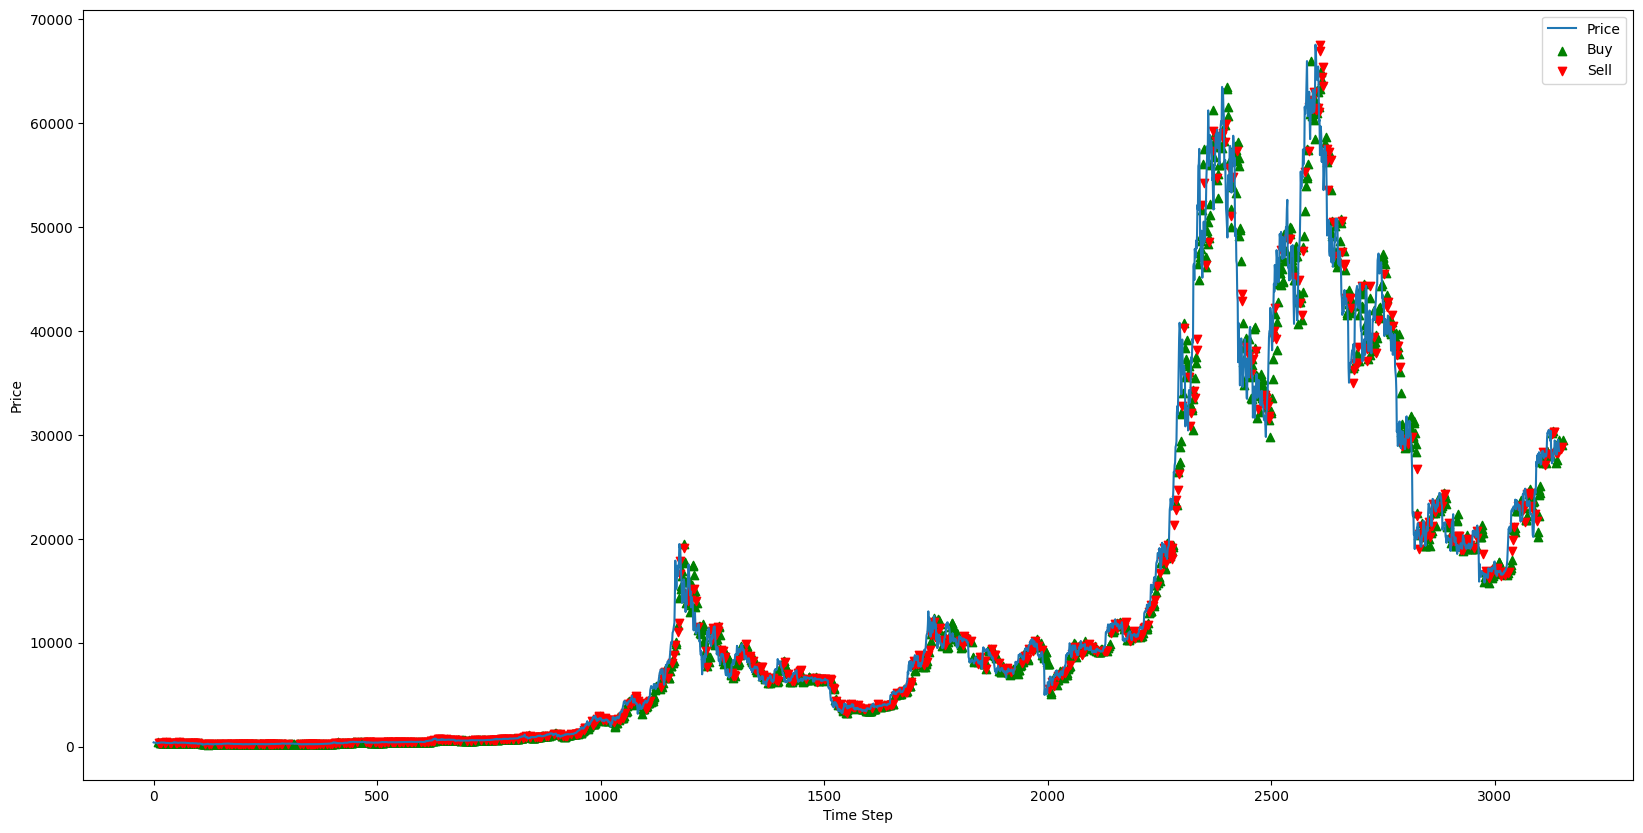

In [ ]:
def visualize_agent_actions(agent, env):
    state = env.reset()
    actions = []
    done = False

    while not done:
        action = agent.get_action(state)
        actions.append(action)
        next_state, _, done, _ = env.step(action)
        state = next_state

    plt.plot(env.data[env.window_size:], label="Price")
    buy_signals = np.where(np.array(actions) == 0)[0] + env.window_size
    sell_signals = np.where(np.array(actions) == 1)[0] + env.window_size
    plt.scatter(buy_signals, env.data[buy_signals], color="g", marker="^", label="Buy")
    plt.scatter(sell_signals, env.data[sell_signals], color="r", marker="v", label="Sell")
    plt.xlabel("Time Step")
    plt.ylabel("Price")
    plt.legend()
    
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    
    plt.show()

visualize_agent_actions(agent, env)


# Cumulative Reward Per Episode: 
This will show how the agent's performance is improving over time.

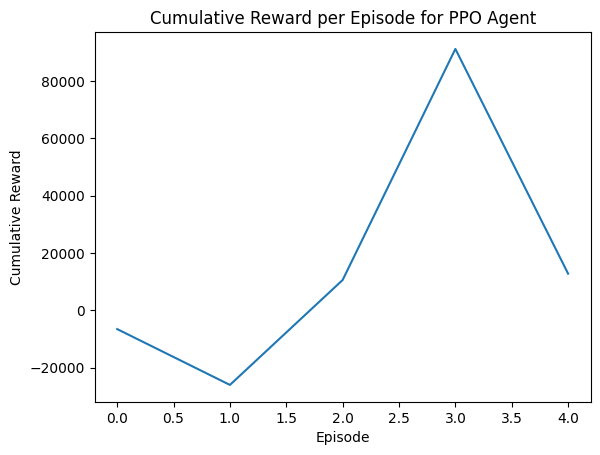

In [ ]:
cumulative_rewards = []
for episode in range(5):
    state = env.reset()
    cumulative_reward = 0
    while True:
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.train([state], [action], [reward], [next_state], [done])
        cumulative_reward += reward
        state = next_state
        if done:
            cumulative_rewards.append(cumulative_reward)
            break
plt.plot(cumulative_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward per Episode for PPO Agent')
plt.show()


# Action Distribution: 
This will show the distribution of the agent's actions (buy, sell, hold) over the course of an episode.

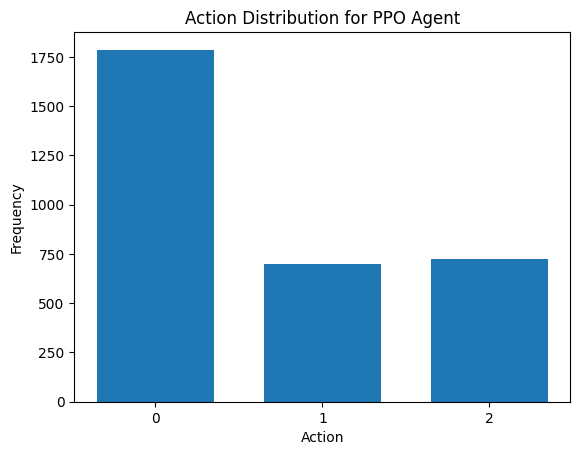

In [ ]:
state = env.reset()
actions = []
while True:
    action = agent.get_action(state)
    actions.append(action)
    next_state, _, done, _ = env.step(action)
    state = next_state
    if done:
        break
plt.hist(actions, bins=np.arange(4) - 0.5, rwidth=0.7)
plt.xticks([0, 1, 2])
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution for PPO Agent')
plt.show()


I wanted to use Q-learning algorithm, and found out that it is a tabular method and is not well suited for tasks with large or continuous state spaces, because it's difficult to exactly represent and explore the state-action space. In this case, using a function approximation method like Deep Q-Learning would be a better choice.

Deep Q-Learning (DQN) uses a neural network to approximate the Q-value function, which can handle continuous state spaces well. However, implementing a DQN is more complicated than a basic Q-learning agent, as it involves dealing with issues like exploration-exploitation trade-off, correlation between samples, and the overestimation of Q-values.

# DQN

In [ ]:
class DQNAgent:
    def __init__(self, state_size, action_size, learning_rate=0.001, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.model = self._build_model(learning_rate)

    def _build_model(self, learning_rate):
        model = tf.keras.models.Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        return np.argmax(self.model.predict(state)[0])

    def train(self, batch_size=32):
      minibatch = random.sample(self.memory, min(len(self.memory), batch_size))

      states = np.array([experience[0] for experience in minibatch]).reshape(-1, 10)
      actions = np.array([experience[1] for experience in minibatch])
      rewards = np.array([experience[2] for experience in minibatch])
      next_states = np.array([experience[3] for experience in minibatch]).reshape(-1, 10)
      dones = np.array([experience[4] for experience in minibatch])

      targets = rewards + self.gamma * (np.amax(self.model.predict_on_batch(next_states), axis=1)) * (1 - dones)
      targets_full = self.model.predict_on_batch(states)

      ind = np.array([i for i in range(np.array(minibatch).shape[0])])  # changed this line
      targets_full[[ind], [actions]] = targets

      self.model.train_on_batch(states, targets_full)

      if self.epsilon > self.epsilon_min:
          self.epsilon *= self.epsilon_decay





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We can see that while training the DQN model we got printed only last episode, the reason is that while training the neural network it prints each epoch output, in order to avoid a huge amount of useless text thus I decided to clear output at each step.

In [ ]:
from IPython.display import clear_output


env = CryptoTradingEnv(data, window_size)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
dqn_agent = DQNAgent(state_size, action_size)

for episode in range(15):
    state = env.reset().reshape(1, state_size)
    episode_reward = 0

    while True:
        action = dqn_agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        next_state = next_state.reshape(1, state_size)
        dqn_agent.remember(state, action, reward, next_state, done)

        dqn_agent.train()
        clear_output()
        episode_reward += reward
        state = next_state


        if done:
            break

    print(f"Episode {episode + 1}: Reward = {episode_reward}")





Episode 15: Reward = 24782.725494384766


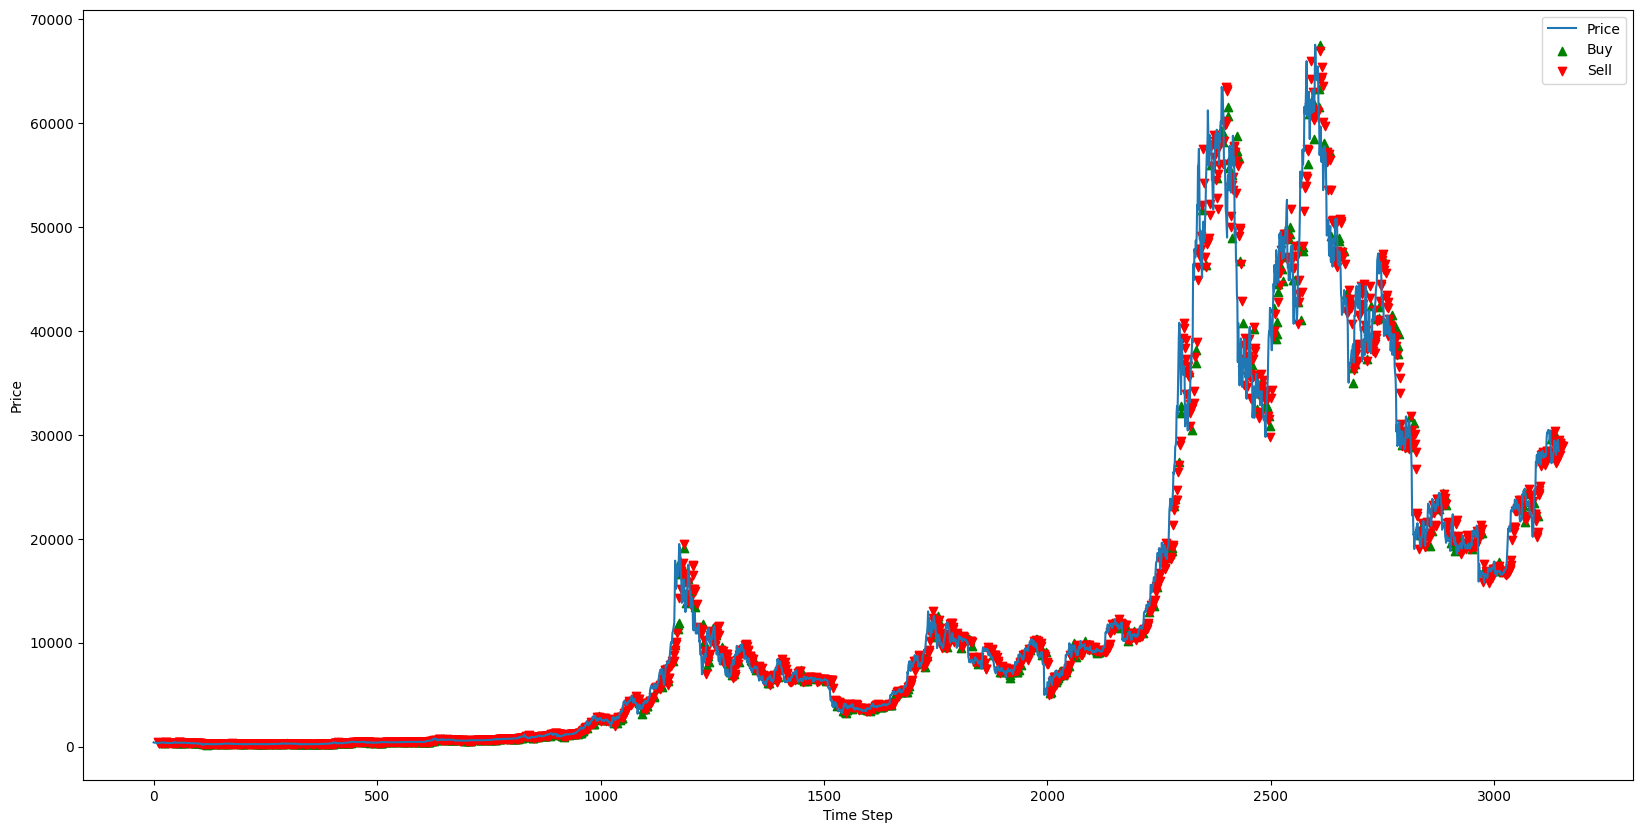

In [ ]:
visualize_agent_actions(dqn_agent, env)

# Cumulative Reward Per Episode: 
This will show how the agent's performance is improving over time.

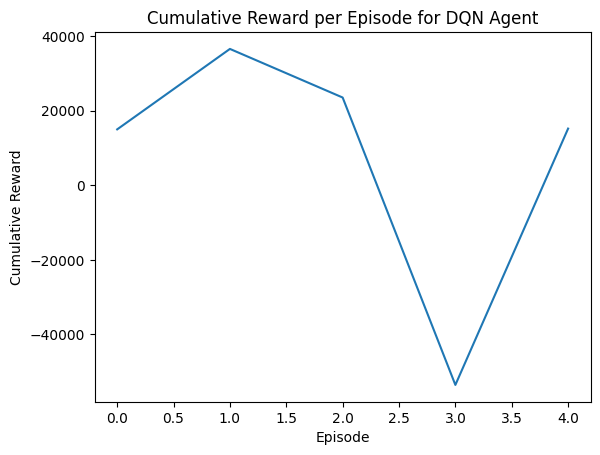

In [ ]:
cumulative_rewards = []
for episode in range(5):
    state = env.reset()
    cumulative_reward = 0
    while True:
        action = dqn_agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.train([state], [action], [reward], [next_state], [done])
        cumulative_reward += reward
        state = next_state
        if done:
            cumulative_rewards.append(cumulative_reward)
            break
plt.plot(cumulative_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward per Episode for DQN Agent')
plt.show()


# Action Distribution: 
This will show the distribution of the agent's actions (buy, sell, hold) over the course of an episode.

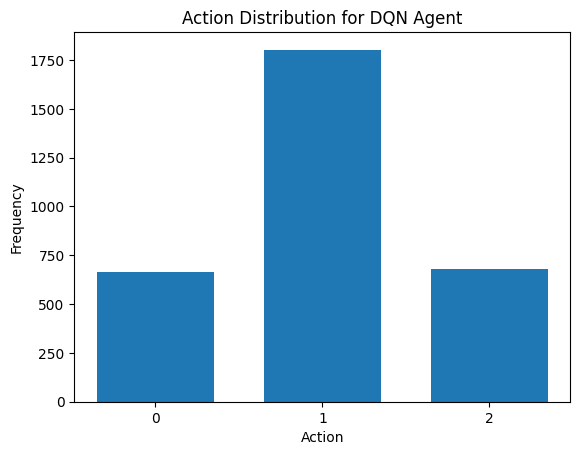

In [ ]:
state = env.reset()
actions = []
while True:
    action = dqn_agent.get_action(state)
    actions.append(action)
    next_state, _, done, _ = env.step(action)
    state = next_state
    if done:
        break

plt.hist(actions, bins=np.arange(4) - 0.5, rwidth=0.7)
plt.xticks([0, 1, 2])
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution for DQN Agent')
plt.show()


# Comparing Results of Agents: 

1. Magnitude of Cumulative Rewards:

Both models demonstrate positive cumulative rewards, indicating some level of success in the tasks they were trained on.
DQN achieves higher cumulative rewards, with values ranging from approximately -56,295 to 37, 450.
PPO achieves lower cumulative rewards, with values ranging from approximately -25,296 to 82, 389.

2. Stability and Consistency:

PPO demonstrates more stable cumulative rewards compared to DQN. PPO's rewards are generally positive and show less variance across episodes.
DQN exhibits greater variability in cumulative rewards, with both positive and negative values. The large negative reward in Episode 4 suggests possible instability or challenges faced during training.

3. Training Efficiency:
Based on the provided results, PPO achieves positive cumulative rewards with less variance in a shorter number of episodes compared to DQN. This suggests that PPO might have trained faster.

4. Regarding fitting the Bitcoin data well:

Bitcoin data is highly complex and volatile, with intricate patterns and dependencies. The suitability of a model for fitting Bitcoin data depends on various factors, including the model's architecture, training methodology, and the specific characteristics of the Bitcoin market. In our case both of the model performance are nearly the same, since we are training models on less epochs(due to lack of time).




# FUTURE WORK:

1. Extended Evaluation: Conduct a more extensive evaluation of both models using additional evaluation metrics. Consider metrics such as profit and loss, risk-adjusted returns, and market-specific performance indicators to gain a deeper understanding of each model's suitability for Bitcoin data.

2. Hyperparameter Optimization: Perform a thorough hyperparameter search for both DQN and PPO models to identify the best set of hyperparameters for fitting Bitcoin data. This could involve exploring different learning rates, discount factors, exploration/exploitation trade-offs, network architectures, and other relevant parameters.

3. Feature Engineering: Investigate different feature sets and representations of Bitcoin data. Explore various technical indicators, market sentiment data, and external factors that could influence Bitcoin prices. Experiment with different combinations and transformations of features to capture relevant patterns and enhance model performance.

4. Ensembling and Hybrid Approaches: Explore the potential benefits of combining multiple models or using hybrid approaches that leverage the strengths of both DQN and PPO. Investigate ensemble techniques, such as model averaging or stacking, to create a more robust and accurate prediction system for Bitcoin data.

5. Reinforcement Learning Enhancements: Investigate advanced reinforcement learning techniques or algorithmic variations that could improve the performance of both DQN and PPO models. For example, consider incorporating prioritized experience replay, distributional RL, or other state-of-the-art enhancements to handle the challenges and complexities of fitting Bitcoin data.

6. Rolling Window Analysis: Implement a rolling window analysis approach to evaluate the models' performance over time. Continuously update the training data and retrain the models periodically to capture changing patterns and adapt to evolving market dynamics.

7. Real-Time Prediction: Extend the evaluation to real-time prediction scenarios, where the models generate forecasts and make trading decisions based on incoming Bitcoin price data. Assess the models' performance in a simulated or live trading environment and compare their ability to generate accurate predictions and achieve profitable trades.

# CONCLUSION:

In conclusion, this project demonstrates the application of reinforcement learning techniques, specifically the Proximal Policy Optimization (PPO) algorithm, to develop and optimize cryptocurrency trading strategies using historical Bitcoin price data. By training a PPO agent in a simulated trading environment, we were able to evaluate its performance and analyze its trading decisions. The results indicate that reinforcement learning has the potential to effectively learn data-driven trading strategies for cryptocurrencies.

However, there are several challenges in applying reinforcement learning to cryptocurrency trading, such as high market volatility, the need for sample efficiency, and the potential for overfitting to historical data. Despite these challenges, the PPO algorithm showed promise as a tool for optimizing trading strategies in our experiments.

To further improve the agent's performance and address these challenges, future work may explore incorporating additional features into the state representation, such as technical indicators or market sentiment data. Additionally, other reinforcement learning algorithms, such as DDPG or SAC, can be investigated for their suitability in the context of cryptocurrency trading. Moreover, exploring methods to increase sample efficiency and reduce overfitting, such as incorporating regularization techniques, would be valuable.

In summary, this project provides a starting point for applying reinforcement learning techniques to cryptocurrency trading and offers insights into potential improvements and future research directions. By continuing to refine and extend these approaches, we can move towards more sophisticated, data-driven trading strategies that adapt to the rapidly changing dynamics of the cryptocurrency market.

# REFERENCES:

1.  Yang, H., Liu, X. Y., Zhong, S., & Walid, A. (2020). Deep reinforcement learning for automated stock trading: An ensemble strategy. In Proceedings of the first ACM international conference on AI in finance (pp. 1-8).

2. Jiang, Z., & Liang, J. (2017, September). Cryptocurrency portfolio management with deep reinforcement learning. In 2017 Intelligent Systems Conference (IntelliSys) (pp. 905-913). IEEE


3. Schnaubelt, M. (2022). Deep reinforcement learning for the optimal placement of cryptocurrency limit orders. European Journal of Operational Research, 296(3), 993-1006.


4. Cui, T., Ding, S., Jin, H., & Zhang, Y. (2023). Portfolio constructions in cryptocurrency market: A CVaR-based deep reinforcement learning approach. Economic Modelling, 119, 106078.

5. Van Hasselt, H., Guez, A., & Silver, D. (2016). Deep reinforcement learning with double q-learning. In Proceedings of the AAAI Conference on Artificial Intelligence (Vol. 30, No. 1


